In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols= ['dataset','text', 'logical_fallacies', 'source']
df = pd.DataFrame(columns= cols)

In [3]:
df_1 = pd.read_csv('../data/cleaned/1_logicClimate.csv')
df_2 = pd.read_csv('../data/cleaned/2_Huggingface_dataset.csv', index_col=0)
df_3 = pd.read_csv('../data/cleaned/3_CoCoLoFa_merged.csv')
df_4 = pd.read_csv('../data/cleaned/4_falcon_df_multilabel_annotations.csv')
df_5_1 = pd.read_csv('../data/cleaned/5_climate.csv')
df_5_2 = pd.read_csv('../data/cleaned/5_covid.csv')
df_6 = pd.read_csv('../data/cleaned/6_MAFALDA.csv')
# df_7 = pd.read_csv('../data/cleaned/7_Reddit_dataset.csv', index_col=0) #identical to 4
df_8 = pd.read_csv('../data/cleaned/8_argotario.csv')
df_9 = pd.read_csv('../data/cleaned/9_Goffredo_used_in_MAFALDA_cleaned.csv')

### 1

In [4]:

df_1['dataset']=1
df_1 = df_1.rename(columns={ 'original_url': 'source', 'source_article': 'text'})
df_1 = df_1.loc[:,cols ]
df_1 = df_1[df_1['logical_fallacies']!='fallacy of logic']
df_1.head()

,dataset,text,logical_fallacies,source
0,1,"In June last year , a severe heatwave claimed ...",intentional,https://www.theguardian.com/environment/2016/a...
1,1,Diminishing sea ice is causing major walrus he...,intentional,https://www.theguardian.com/environment/2016/a...
2,1,A landmark report from the United Nations ’ sc...,fallacy of credibility,https://www.nytimes.com/2018/10/07/climate/ipc...
3,1,"The report “ is quite a shock , and quite conc...",fallacy of credibility,https://www.nytimes.com/2018/10/07/climate/ipc...
4,1,The World Coal Association disputed the conclu...,false dilemma,https://www.nytimes.com/2018/10/07/climate/ipc...


### 2

In [5]:

df_2['dataset']=2
df_2 = df_2.rename(columns={ 'statement': 'text', 'label': 'logical_fallacies'})
df_2 = df_2.loc[:,['dataset', 'text', 'logical_fallacies']]
df_2 = df_2[df_2['logical_fallacies']!='fallacy of logic']
df_2.head()

,dataset,text,logical_fallacies
0,2,"The book is popular because it's good, and it'...",circular reasoning
1,2,"This policy is effective because it's popular,...",circular reasoning
2,2,I know that our TV advertisements are more eff...,faulty generalization
3,2,"President Trump , who in the past has called g...",intentional
4,2,A commercial shows a group of friends all hang...,ad populum


### 3

In [6]:
df_3 = df_3[['fallacy', 'comment']]
df_3 = df_3.rename(columns={'fallacy':'logical_fallacies', 'comment': 'text' })
df_3['dataset'] = 3
df_3 = df_3.loc[:,['dataset','text', 'logical_fallacies']]
df_3.head()

,dataset,text,logical_fallacies
0,3,Lack of transparency in government isn't unexp...,none
1,3,While the issues discussed here should be addr...,appeal to authority
2,3,The excuse that Brazilian municipalities do no...,none
3,3,This is what's to be expected of developing an...,none
4,3,"Sad to say, I have to agree with you. Rulers c...",appeal to tradition


### 4

In [7]:

df_4 = df_4[['fallacy','main_tweet']]
df_4 = df_4.rename(columns={'fallacy':'logical_fallacies','main_tweet': 'text' })
df_4.head()


,logical_fallacies,text
0,['None of the above'],[main_tweet] [user104337]: @user @user ... @us...
1,['None of the above'],[main_tweet] [user79987]: @user @user ... @use...
2,['None of the above'],[main_tweet] [user104337]: @user @user ... @us...
3,"['Loaded Language', 'Ad Hominem']",[main_tweet] [user79987]: @user @user ... @use...
4,['None of the above'],[main_tweet] [user47446]: @user @user ... @use...


In [8]:
i = 0

df_splitted_fallacies = pd.DataFrame(columns=['logical_fallacies', 'text'])
rows_to_delete=[]

for i in range(len(df_4)):
    # print(i)
    current_fallacies = df_4.iloc[i, 0]
    # print('current_fallacies:', current_fallacies)
    current_fallacies = current_fallacies.replace("'", "").replace('[', '').replace(']','')
    splitted_fallacies = current_fallacies.split(sep=',')
    if len(splitted_fallacies)==1:
        df_4.iloc[i, 0] = current_fallacies
    if len(splitted_fallacies)>1:
        for index, f in enumerate(splitted_fallacies):
            new_row = {'logical_fallacies':f, 'text': df_4.iloc[i, 1]}
            df_splitted_fallacies = pd.concat([df_splitted_fallacies, pd.DataFrame([new_row])])
            rows_to_delete.append(i)

    
    

In [9]:
 #remove duplicates
rows_to_delete = list(set(rows_to_delete))

#drop rows with multilabels
df_4 = df_4.drop(axis=0, index=rows_to_delete)

In [10]:
# concate new rows to dataframe
df_4 = pd.concat([df_4, df_splitted_fallacies])
df_4.head()

,logical_fallacies,text
0,None of the above,[main_tweet] [user104337]: @user @user ... @us...
1,None of the above,[main_tweet] [user79987]: @user @user ... @use...
2,None of the above,[main_tweet] [user104337]: @user @user ... @us...
4,None of the above,[main_tweet] [user47446]: @user @user ... @use...
5,Loaded Language,[main_tweet] [user1779]: @user @user ... @user...


In [11]:
df_4['dataset']=4
df_4 = df_4.loc[:,['dataset', 'text', 'logical_fallacies']]

### 5

In [12]:
df_5_1.head()

,fact_checked_segment,comment_by_fact-checker,article,logical_fallacies
0,“climate economists see a positive externality...,This is cherry-picking at its worst. You can a...,article36.txt,Cherry Picking
1,The latest U.N. science compendium asserts tha...,The recent US National Climate Assessment1 fin...,article130.txt,Cherry Picking
2,"“‘If we are right, our study challenges decade...",It only potentially challenges ONE method used...,NaN,Cherry Picking
3,“a killer analysis conducted by Craig Idso of ...,"This publication is not peer-reviewed, cherry-...",article45.txt,Cherry Picking
4,"“Next year or the year after that, I think it ...",I would also add that predictions of an ice-fr...,article33.txt,Cherry Picking


In [13]:
df_5_1 = df_5_1[['fact_checked_segment', 'logical_fallacies', 'article']]
df_5_1 = df_5_1.rename(columns={'fact_checked_segment': 'text', 'article': 'source'})
df_5_1['dataset'] = 5
df_5_1 = df_5_1.loc[:,['dataset', 'text', 'logical_fallacies', 'source']]
df_5_1.head()

,dataset,text,logical_fallacies,source
0,5,“climate economists see a positive externality...,Cherry Picking,article36.txt
1,5,The latest U.N. science compendium asserts tha...,Cherry Picking,article130.txt
2,5,"“‘If we are right, our study challenges decade...",Cherry Picking,NaN
3,5,“a killer analysis conducted by Craig Idso of ...,Cherry Picking,article45.txt
4,5,"“Next year or the year after that, I think it ...",Cherry Picking,article33.txt


In [14]:
df_5_2.head()

df_5_2 = df_5_2[['claim', 'logical_fallacies']]
df_5_2 = df_5_2.rename(columns={'claim': 'text' })
df_5_2['dataset'] = 5
df_5_2 = df_5_2.loc[:,['dataset', 'text', 'logical_fallacies']]
df_5_2.head()


,dataset,text,logical_fallacies
0,5,"In November 2020, Ticketmaster announced that ...",Cherry Picking
1,5,Says that “the way to reach ‘herd immunity’ is...,Cherry Picking
2,5,The public won’t be able to claim compensation...,Cherry Picking
3,5,“vaccinated children appear to be significantl...,Cherry Picking
4,5,The WHO now says a child’s presence in school ...,Cherry Picking


### 6

In [15]:
df_6.head()
df_6 = df_6.rename(columns={'text_only': 'text', 'labels_only': 'logical_fallacies'})
df_6['dataset'] = 6
df_6 = df_6.loc[:,['dataset', 'text', 'logical_fallacies']]
df_6.head()

,dataset,text,logical_fallacies
0,6,Reading everyone's comments has made me change...,slippery slope
1,6,"Two of my best friends are really introverted,...",hasty generalization
2,6,"Someone once told me they have an""alt"" cause t...",false analogy
3,6,Joe Biden will lose to Trump if he is the nomi...,guilt by association
4,6,"America is the best place to live, because it'...",circular reasoning


### 8

In [16]:
pd.set_option('display.max_colwidth', None)
df_8.tail(10)

,logical_fallacies,claim
1334,No Fallacy,"Nowadays, nuclear power is the most effective and safest energy source we have."
1335,Ad Hominem,What kind of dumb question is that? Stupid answers get stupid responses.
1336,No Fallacy,"Accepting immigrants in Europe must be taken seriously and deserves coordination and investments, as we cannot directly influence the sources of immigration - ending the war in Libya or changing the regime in Eritrea."
1337,No Fallacy,So far there is a limit of 0.5 per-mille. With this amount of alcohol you are able to drive safely. Therefore the answer is no.
1338,No Fallacy,Animal testing for medical purposes should be allowed.
1339,Appeal to Emotion,"Sure, let's make America great again! Go ask ordinary people in Afghanistan. Go check with bombed out schools in Iraq after ""freeing"" the country. Talk to refugees who had to leave their homes. Maybe you'll figure out then."
1340,No Fallacy,"No. Greece is one of the countries, that, in its history, has contributed to an european union the most. Throwing this country out of it, would therefore destroy confidence in this community, the most."
1341,No Fallacy,Interestingly the boys I know from single sex schools seem more against it than the girls and they do feel they were socially hampered a bit.
1342,No Fallacy,"It has, earlier the people talked more with each other."
1343,No Fallacy,It's a time killer


In [17]:
df_8.head()
df_8 = df_8.dropna()
df_8 = df_8.rename(columns={'claim': 'text' })
df_8['dataset'] = 8
df_8 = df_8.loc[:,['dataset', 'text', 'logical_fallacies']]
df_8.head()

,dataset,text,logical_fallacies
0,8,"No, imagine you were a teacher and everybody would just concentrate on their smartphones? How would that feel?",Appeal to Emotion
1,8,"The moon is so far away, we should focus on our society.",Red Herring
2,8,"The green party in Germany has the opinion, that nuclear reactors are bad for us. It is not ok",Irrelevant Authority
3,8,"No, not at all. Nowadays kids spend all time playing around with tablets and smartphones, which is kinda detrimental to their proper development.",Red Herring
4,8,"Yes, whoever drinks and drives has a bad reaction time. People might die.",No Fallacy


### 9

In [18]:
df_9 = df_9[['text', 'fallacy']]
df_9 = df_9.rename(columns={'fallacy': 'logical_fallacies' })
df_9['dataset'] = 9
df_9 = df_9.loc[:,['dataset', 'text', 'logical_fallacies']]
df_9.head()

,dataset,text,logical_fallacies
0,9,"And I think you get a certain arrogance, bureaucratic arrogance, if people stay there too long.",Ad Hominem
1,9,Bill Clinton simply has trouble telling the truth?,Ad Hominem
2,9,he has a long record of engaging in racist behavior.,Ad Hominem
3,9,she's got no business ability,Ad Hominem
4,9,she doesn't have that,Ad Hominem


### lower case, underscore

In [19]:

def adjust(data):
    data['logical_fallacies']=data['logical_fallacies'].map(lambda x: x.lower().replace(' ', '_'))
    return data

df_1 = adjust(df_1)
df_2 = adjust(df_2)
df_3 = adjust(df_3)
df_4 = adjust(df_4)
df_5_1 = adjust(df_5_1)
df_5_2= adjust(df_5_2)
df_6 = adjust(df_6)
df_8 = adjust(df_8)
df_9 = adjust(df_9)

In [20]:
# dfList = [df_1, df_2, df_3, df_4 ,df_5_1, df_5_2, df_8, df_9]
# for d in dfList:
#     print (d.columns)


### concat

In [21]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5_1, df_5_2, df_6, df_8, df_9])
df = df.reset_index(drop=True)
df

,dataset,text,logical_fallacies,source
0,1,"In June last year , a severe heatwave claimed over 1,000 lives in Karachi , Pakistan . Severe drought caused food shortages for millions of people in Ethiopia , with a lack of rainfall resulting in “ intense and widespread ” forest fires in Indonesia that belched out a vast quantity of greenhouse gas .",intentional,https://www.theguardian.com/environment/2016/aug/02/environment-climate-change-records-broken-international-report
1,1,"Diminishing sea ice is causing major walrus herds to haul themselves out on to land . Arctic marine species , such as snailfish and polar cod , are being pushed out of the region by species coming from further south , attracted to the warming waters . A huge algal bloom off the west coast of North America harmed marine life and fisheries .",intentional,https://www.theguardian.com/environment/2016/aug/02/environment-climate-change-records-broken-international-report
2,1,A landmark report from the United Nations ’ scientific panel on climate change paints a far more dire picture of the immediate consequences of climate change than previously thought and says that avoiding the damage requires transforming the world economy at a speed and scale that has “ no documented historic precedent . ”,fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
3,1,"The report “ is quite a shock , and quite concerning , ” said Bill Hare , an author of previous I.P.C.C . reports and a physicist with Climate Analytics , a nonprofit organization . “ We were not aware of this just a few years ago. ”",fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
4,1,The World Coal Association disputed the conclusion that stopping global warming calls for an end of coal use .,false_dilemma,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
...,...,...,...,...
20161,9,separation of church and state,slogans,NaN
20162,9,Our character is on the ballot,slogans,NaN
20163,9,Show up and vote,slogans,NaN
20164,9,I don't believe that Hillary has the stamina.,ad_hominem,NaN


In [22]:
df = df[df['logical_fallacies']!='to_clean']

In [23]:
df = df[df['logical_fallacies']!='intentional']

In [24]:
fall_list = df['logical_fallacies'].unique().tolist()
fall_list.sort()
fall_list

['_ad_hominem',
 '_appeal_to_fear',
 '_appeal_to_ridicule',
 '_false_dilemma',
 '_hasty_generalization',
 'ad_hominem',
 'ad_populum',
 'appeal_to_(false)_authority',
 'appeal_to_anger',
 'appeal_to_authority',
 'appeal_to_emotion',
 'appeal_to_fear',
 'appeal_to_majority',
 'appeal_to_nature',
 'appeal_to_pity',
 'appeal_to_positive_emotion',
 'appeal_to_ridicule',
 'appeal_to_tradition',
 'appeal_to_worse_problems',
 'causal_oversimplification',
 'cherry_picking',
 'circular_reasoning',
 'equivocation',
 'evading_the_burden_of_proof',
 'fallacy_of_credibility',
 'fallacy_of_division',
 'fallacy_of_extension',
 'fallacy_of_relevance',
 'false_analogy',
 'false_authority',
 'false_causality',
 'false_cause',
 'false_dilemma',
 'faulty_generalization',
 'guilt_by_association',
 'hasty_generalization',
 'irrelevant_authority',
 'loaded_language',
 'no_fallacy',
 'none',
 'none_of_the_above',
 'post_hoc',
 'red_herring',
 'slippery_slope',
 'slogans',
 'straw_man',
 'strawman',
 'tu_quoqu

In [25]:
labels ={
    'none_of_the_above': 'none',
    '_ad_hominem': 'ad_hominem',
    '_hasty_generalization':'hasty_generalization',
    '_appeal_to_ridicule': 'appeal_to_ridicule',
    '_false_dilemma': 'false_dilemma',
    '_appeal_to_fear':'appeal_to_fear',
    'no_fallacy': 'none',
    'straw_man': 'strawman',
    'appeal_to_fear': 'appeal_to_emotion',
    'appeal_to_anger': 'appeal_to_emotion',
    'appeal_to_pity': 'appeal_to_emotion',
    'appeal_to_positive_emotion': 'appeal_to_emotion',
    'appeal_to_(false)_authority' : 'appeal_to_authority',
    'false_authority': 'appeal_to_authority',
    'hasty_generalization': 'faulty_generalization'
}

df= df.replace(labels)

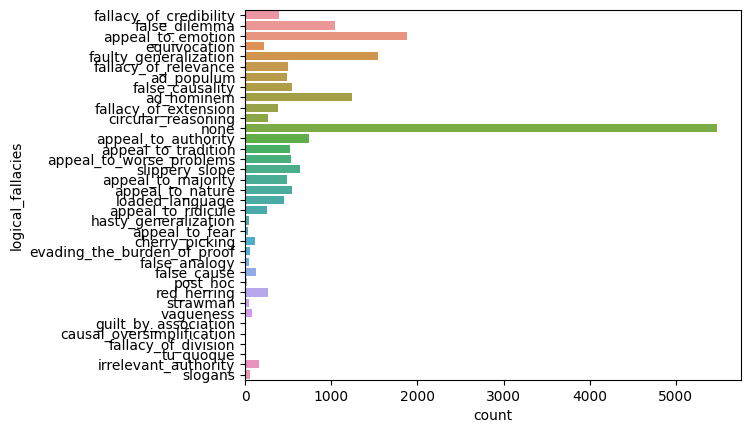

In [26]:
sns.countplot(data = df, y ='logical_fallacies')
plt.show()

In [27]:
df.groupby('logical_fallacies')['logical_fallacies'].value_counts().sort_values(ascending=False)

logical_fallacies
none                           5482
appeal_to_emotion              1878
faulty_generalization          1538
ad_hominem                     1244
false_dilemma                  1043
appeal_to_authority             744
slippery_slope                  638
appeal_to_nature                544
false_causality                 543
appeal_to_worse_problems        535
appeal_to_tradition             518
fallacy_of_relevance            499
appeal_to_majority              492
ad_populum                      492
loaded_language                 457
fallacy_of_credibility          397
fallacy_of_extension            382
red_herring                     271
circular_reasoning              264
appeal_to_ridicule              250
equivocation                    224
irrelevant_authority            157
false_cause                     129
cherry_picking                  118
vagueness                        81
evading_the_burden_of_proof      62
slogans                          52
strawman  

## Drop missing values

In [28]:
df = df.dropna(subset=['text'])

## Clean text

In [29]:
df.head()

,dataset,text,logical_fallacies,source
2,1,A landmark report from the United Nations ’ scientific panel on climate change paints a far more dire picture of the immediate consequences of climate change than previously thought and says that avoiding the damage requires transforming the world economy at a speed and scale that has “ no documented historic precedent . ”,fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
3,1,"The report “ is quite a shock , and quite concerning , ” said Bill Hare , an author of previous I.P.C.C . reports and a physicist with Climate Analytics , a nonprofit organization . “ We were not aware of this just a few years ago. ”",fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
4,1,The World Coal Association disputed the conclusion that stopping global warming calls for an end of coal use .,false_dilemma,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
5,1,"In a statement , Katie Warrick , its interim chief executive , noted that forecasts from the International Energy Agency , a global analysis organization , “ continue to see a role for coal for the foreseeable future . ”",fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
6,1,Refusing to approve the document would place the United States at odds with many nations and show it rejecting established academic science on the world stage .,appeal_to_emotion,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html


In [30]:
df.sort_values(by='text')

,dataset,text,logical_fallacies,source
2674,2,"\nThe presence of police at protests cause an escalation of violence. It was the case that at the protest last night attended by uniformed police, there was an escalation of violence. Therefore, police should not be at protests.",false_causality,NaN
2209,2,"Homosexuality is / ought to be morally wrong (moral property) because it is not normal (natural property).\nor\nHomosexuality is not normal (natural property); therefore, it is / ought to be morally wrong (moral property).",fallacy_of_credibility,NaN
16882,5,COVID-19 vaccines caused miscarriages,post_hoc,NaN
4520,2,Circular definition: a definition that is circular.\n,circular_reasoning,NaN
3763,2,"Doug is convinced he has lucky underwear. One time when he forgot to put on his lucky underwear, he got a parking ticket. Doug concludes that because he forgot to wear his lucky underwear, he got the ticket. Doug doesn't wash his lucky underwear often. This part isn't relevant to the example, but it is disturbing nonetheless.",false_causality,NaN
...,...,...,...,...
16213,5,"” ‘You’ve only got to look at Singapore. It’s two-and-a-half times higher than the worst-case scenario for climate change, and it’s one of the most desirable cities in the world to live in.’ ”",false_analogy,NaN
16146,5,"” ‘You’ve only got to look at Singapore. It’s two-and-a-half times higher than the worst-case scenario for climate change, and it’s one of the most desirable cities in the world to live in.’ ”",cherry_picking,NaN
16741,5,"” ‘and it’s only got to take one sizable volcano to erupt and all the models, everything else, is right off the board’ ”",none,NaN
16653,5,"” ‘and it’s only got to take one sizable volcano to erupt and all the models, everything else, is right off the board’ ”",red_herring,NaN


In [ ]:
import re
#https://docs.python.org/3/library/re.html

#administration \' s
# \n

def clean_text(text):
    # Remove POST
    #text = re.sub(r'^.*?POST:', '', text, flags=re.DOTALL)
    # Remove any remaining "POST:" occurrences
    #text = re.sub(r'POST:', '', text)
    # Remove '\r\n' and extra whitespace
    #text = re.sub(r'\r\n', ' ', text)
    # Remove '\n'
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\r', '', text)
    # Remove " in beginning of text
    text = re.sub(r'^"', '', text)
    # Remove " at end of text
    text = re.sub(r'"$', '', text)
     # Remove ' in beginning of text
    text = re.sub(r"^'", '', text)
    # Remove ' at end of text
    text = re.sub(r"'$", '', text)
    # Remove (number or text) at beginning of text
    text = re.sub(r"^\([^)]*\)", '', text)
    # Remove \x80\x9d
    text = re.sub(r'\x80\x9d', '', text)
     # Remove : in beginning of text
    text = re.sub(r"^:", '', text)
    # Remove · in beginning of text
    text = re.sub(r"^•", '', text)
    # Remove ” in beginning of text
    text = re.sub(r"^”", '', text)
    # Remove @user
    text = re.sub(r'@user', '', text)
    # Remove [main_tweet], [user104337]
    text = re.sub(r"\[main_tweet\]", '', text)
    text = re.sub(r"\[user\d+\]", '', text)
     # Remove punctuation
    text = re.sub(r'\W', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # leads to some empty rows, need to check
    return text.strip()

df['text'] = df['text'].apply(clean_text)

In [32]:
df.loc[1641, "text"]

', rather than on his arguments or opinions.'

In [33]:
txt = "hallo \r chocolatecake"

#Check if the string starts with 'hello':
#x = re.sub(r"\[user\d+\]", '', txt)
x = re.sub(r'\r', '', txt)
# x = re.sub(r"^\[[^)]*\]", '', txt)
print(x)


hallo  chocolatecake


## Duplicates

In [34]:
df.head()

,dataset,text,logical_fallacies,source
2,1,A landmark report from the United Nations ’ scientific panel on climate change paints a far more dire picture of the immediate consequences of climate change than previously thought and says that avoiding the damage requires transforming the world economy at a speed and scale that has “ no documented historic precedent . ”,fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
3,1,"The report “ is quite a shock , and quite concerning , ” said Bill Hare , an author of previous I.P.C.C . reports and a physicist with Climate Analytics , a nonprofit organization . “ We were not aware of this just a few years ago. ”",fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
4,1,The World Coal Association disputed the conclusion that stopping global warming calls for an end of coal use .,false_dilemma,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
5,1,"In a statement , Katie Warrick , its interim chief executive , noted that forecasts from the International Energy Agency , a global analysis organization , “ continue to see a role for coal for the foreseeable future . ”",fallacy_of_credibility,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html
6,1,Refusing to approve the document would place the United States at odds with many nations and show it rejecting established academic science on the world stage .,appeal_to_emotion,https://www.nytimes.com/2018/10/07/climate/ipcc-climate-report-2040.html


In [35]:
df_duplicated = df[df.duplicated(["text", "logical_fallacies"], keep=False)==True]
df_duplicated = df_duplicated.sort_values(by='text')
df_duplicated.head(20)

,dataset,text,logical_fallacies,source
2715,2,"18 years after 1998 , global warming still has not created the runaway warming we were told to expect .",ad_populum,NaN
37,1,"18 years after 1998 , global warming still has not created the runaway warming we were told to expect .",ad_populum,https://www.forbes.com/sites/jamestaylor/2016/01/14/2015-was-not-even-close-to-hottest-year-on-record/?sh=7170b4ef5539
2886,2,"2 ) CO2 is a greenhouse gas without which life on earth is not possible , but adding it to theatmosphere should lead to some warming .",fallacy_of_relevance,NaN
1252,1,"2 ) CO2 is a greenhouse gas without which life on earth is not possible , but adding it to theatmosphere should lead to some warming .",fallacy_of_relevance,https://www.facebook.com/watch/?v=3169298993112935
13623,4,": ... Man who thinks windmills cause cancer, suggested bleach cures Covid, confused Nepal and Bhutan with 'Nipple and Button', altered a weather map with a sharpie and boasts about his ability to recognize an elephant retweets crazy lady who believes in demon seed. But her emails.",none,NaN
13621,4,": ... Man who thinks windmills cause cancer, suggested bleach cures Covid, confused Nepal and Bhutan with 'Nipple and Button', altered a weather map with a sharpie and boasts about his ability to recognize an elephant retweets crazy lady who believes in demon seed. But her emails.",none,NaN
13622,4,": ... Man who thinks windmills cause cancer, suggested bleach cures Covid, confused Nepal and Bhutan with 'Nipple and Button', altered a weather map with a sharpie and boasts about his ability to recognize an elephant retweets crazy lady who believes in demon seed. But her emails.",none,NaN
13222,4,": Cheap antiparasitic could cut chance of Covid-19 deaths by up to 75% January 19, 2021 #ROC #ivermectin #ivermectinworks",none,NaN
13226,4,": Cheap antiparasitic could cut chance of Covid-19 deaths by up to 75% January 19, 2021 #ROC #ivermectin #ivermectinworks",none,NaN
190,1,"A comprehensive list would run to hundreds , if not thousands , of elements , none of which scientists would claim to understand with absolute precision .",ad_populum,https://www.bostonglobe.com/opinion/columns/2017/03/14/why-are-climate-change-models-flawed-because-climate-science-incomplete/hekwjPBTScRpFyXaXnrWhI/story.html


In [36]:
df = df.drop_duplicates(subset=['text', 'logical_fallacies'], keep='first')

In [37]:
df.duplicated(['text']).sum()

619

In [38]:
df.duplicated(['text', 'logical_fallacies']).sum()

0

In [39]:
df['dataset'].value_counts().sort_index()

dataset
1     867
2    3558
3    6905
4    3274
5     787
6     172
8    1330
9    1602
Name: count, dtype: int64

## Select fallacies

In [40]:
df.groupby('logical_fallacies')['logical_fallacies'].value_counts().sort_values(ascending=False)

logical_fallacies
none                           5445
appeal_to_emotion              1749
faulty_generalization          1446
ad_hominem                     1167
false_dilemma                  1008
appeal_to_authority             734
slippery_slope                  632
appeal_to_nature                544
appeal_to_worse_problems        534
appeal_to_tradition             518
appeal_to_majority              492
false_causality                 484
loaded_language                 457
ad_populum                      445
fallacy_of_relevance            425
fallacy_of_extension            339
fallacy_of_credibility          327
red_herring                     268
circular_reasoning              253
appeal_to_ridicule              250
equivocation                    209
irrelevant_authority            157
false_cause                     115
cherry_picking                  111
vagueness                        78
evading_the_burden_of_proof      57
slogans                          50
strawman  

In [41]:

most_freq_fallacies = df.groupby('logical_fallacies')['logical_fallacies'].value_counts().sort_values(ascending=False).index[:6]
most_freq_fallacies


Index(['none', 'appeal_to_emotion', 'faulty_generalization', 'ad_hominem',
       'false_dilemma', 'appeal_to_authority'],
      dtype='object', name='logical_fallacies')

## Save dataset

In [42]:
df = df[df['logical_fallacies'].isin(most_freq_fallacies)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11549 entries, 4 to 20165
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   dataset            11549 non-null  int64 
 1   text               11549 non-null  object
 2   logical_fallacies  11549 non-null  object
 3   source             531 non-null    object
dtypes: int64(1), object(3)
memory usage: 451.1+ KB


In [43]:
# Save dataset
df.to_csv("../data/data.csv")

#### save dataset with min-max-characters/text_length

In [44]:
df_text = df.copy()
df_text['text_char_length'] = df_text['text'].map(lambda x : len(x))
df_text['text_word_length'] = df_text['text'].str.split().str.len()
df_text.describe()

,dataset,text_char_length,text_word_length
count,11549.000000,11549.000000,11549.000000
mean,4.261495,220.603689,38.723612
std,2.382142,167.943842,29.774257
min,1.000000,2.000000,1.000000
25%,3.000000,92.000000,16.000000
50%,3.000000,190.000000,33.000000
75%,4.000000,292.000000,52.000000
max,9.000000,1406.000000,253.000000


In [45]:
# Bin text word length
labels = ["small" ,"medium small" , "medium", "medium large", "large"]
df_text['text_word_length_bin'], bin_edges = pd.cut(df_text['text_word_length'], retbins=True, bins=5, labels=labels)
print("bin edges", bin_edges)
df_text["text_word_length_bin"].value_counts()

bin edges [  0.748  51.4   101.8   152.2   202.6   253.   ]


text_word_length_bin
small           8581
medium small    2486
medium           401
medium large      68
large             13
Name: count, dtype: int64

In [46]:
crosstable = pd.crosstab(df_text['text_word_length_bin'], df_text['logical_fallacies'], normalize="columns")
round(crosstable*100, 2)

logical_fallacies,ad_hominem,appeal_to_authority,appeal_to_emotion,false_dilemma,faulty_generalization,none
text_word_length_bin,,,,,,
small,95.63,53.81,94.28,67.56,74.27,67.33
medium small,4.03,40.74,5.15,27.38,21.92,26.76
medium,0.34,3.54,0.40,3.87,3.39,5.07
medium large,0.00,1.63,0.17,0.99,0.28,0.72
large,0.00,0.27,0.00,0.20,0.14,0.13


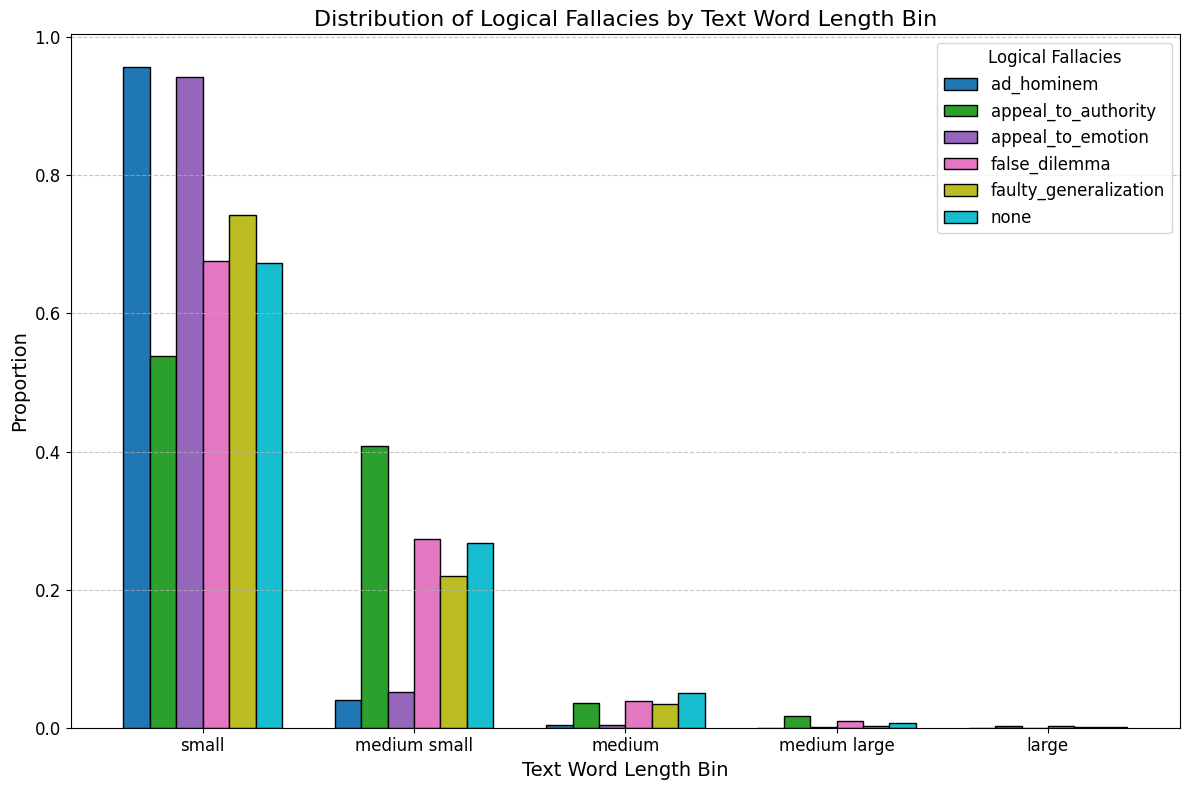

In [47]:
crosstable.plot(kind="bar", figsize=(12, 8), edgecolor="black", colormap="tab10", width = 0.75)
plt.title("Distribution of Logical Fallacies by Text Word Length Bin", fontsize=16)
plt.xlabel("Text Word Length Bin", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Logical Fallacies", fontsize=12, title_fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Drop rows with too less or too many characters

In [48]:
MIN_CHAR = 100
MAX_CHAR = 300

df_text = df_text.drop(df_text[df_text['text_char_length'] < MIN_CHAR].index)
df_text = df_text.drop(df_text[df_text['text_char_length'] > MAX_CHAR].index)

df_text.to_csv('../data/data_text.csv')

In [49]:
df_text_dropped = df_text.copy()

In [50]:
# Bin text word length after drop of min and max characters
labels = ["small" ,"medium small" , "medium", "medium large", "large"]
df_text_dropped['text_word_length_bin'], bin_edges = pd.cut(df_text_dropped['text_word_length'], retbins=True, bins=5, labels=labels)
print("bin edges", bin_edges)
df_text_dropped["text_word_length_bin"].value_counts()

bin edges [ 5.942 17.6   29.2   40.8   52.4   64.   ]


text_word_length_bin
medium small    1948
medium large    1661
medium          1646
large            249
small            162
Name: count, dtype: int64

In [51]:
crosstable_dropped = pd.crosstab(df_text_dropped['text_word_length_bin'], df_text_dropped['logical_fallacies'], normalize="columns")
round(crosstable_dropped*100, 2)

logical_fallacies,ad_hominem,appeal_to_authority,appeal_to_emotion,false_dilemma,faulty_generalization,none
text_word_length_bin,,,,,,
small,3.36,1.45,1.46,1.56,2.89,3.49
medium small,39.82,35.47,44.87,27.01,39.45,30.36
medium,31.33,28.78,30.36,29.91,27.17,28.61
medium large,22.83,28.49,20.77,35.94,25.87,32.73
large,2.65,5.81,2.53,5.58,4.62,4.82


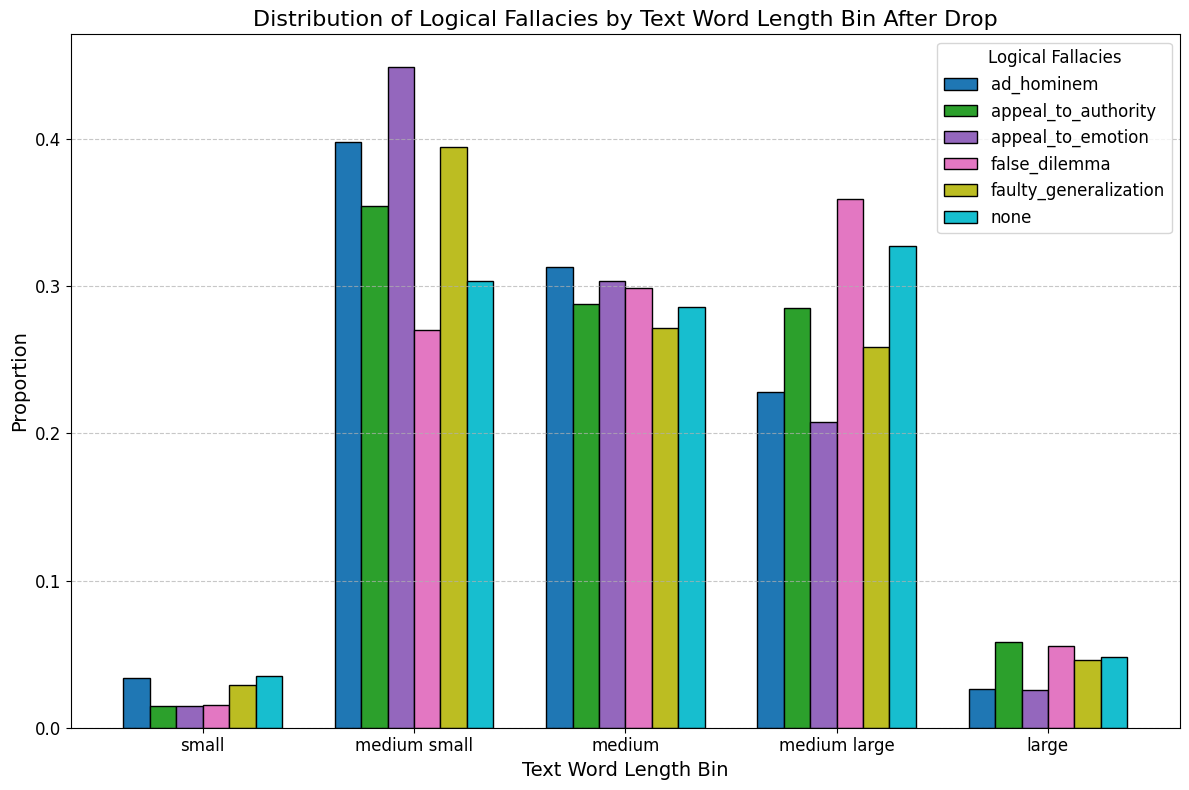

In [52]:
crosstable_dropped.plot(kind="bar", figsize=(12, 8), edgecolor="black", colormap="tab10", width = 0.75)
plt.title("Distribution of Logical Fallacies by Text Word Length Bin After Drop", fontsize=16)
plt.xlabel("Text Word Length Bin", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Logical Fallacies", fontsize=12, title_fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [53]:
# MIN_WORD = 100
# MAX_WORD = 300

# df_text = df_text.drop(df_text[df_text['text_word_length'] < MIN_WORD].index)
# df_text = df_text.drop(df_text[df_text['text_word_length'] > MAX_WORD].index)

#### save small dataset, randomly choosen

In [54]:
number_of_rows = 5000
RSEED = 42

df_small = df.sample(number_of_rows, axis=0, random_state=RSEED)
df_small.head()

,dataset,text,logical_fallacies,source
18384,8,Testing on animals could save the life of you or a family member. Do you really think the life of your child is less important than a mouse?,appeal_to_emotion,NaN
11271,3,"I remember when China took over Hong Kong, I read that they would allow the people to have the same rights they enjoyed before. I don't believe that this is the case. It seems like more and more, the Chinese government is trying to limit the freedoms of the people of Hong Kong. I feel for them. The censoring the press is just another example. At some point the people will rise up and seek their freedom. China's pledge to allow the people of Hong Kong to have their freedom is nothing but a fallacy.",none,NaN
15702,4,": The only ""Light at the End of the Tunnel"", is ""The Light"" you see when you die from the Covid Vaccine! 64 500 (SIXTY FOUR FIVE HUNDRED THOUSAND) People DIED from the Covid Vaccine in the US between 1 January 2021 and12 February 2021. Nobody Died from IVERMECTIN 👇👇",appeal_to_emotion,NaN
7148,3,So you only believe there are two ways to run a country? To either let it be completely free or communist? Don't you see that there are more options than that? That we can have freedom but also some controls to protect the people? Many countries have lots of freedoms but also some restrictions that help keep their people safe. I think if you consider you will realize that there are many more options than just complete freedom or a communist state.,none,NaN
8147,3,Keep things the way they are or change them completely. There is no room to make minor changes. We either take a stand or a bold leap forward.,false_dilemma,NaN


In [55]:
df_small.to_csv("../data/data_small.csv")

#### Tiny dataset

In [56]:
number_of_rows = 100
RSEED = 42

df_tiny = df.sample(number_of_rows, axis=0, random_state=RSEED)

In [57]:
df_tiny['logical_fallacies'].unique()

array(['appeal_to_emotion', 'none', 'false_dilemma', 'ad_hominem',
       'faulty_generalization', 'appeal_to_authority'], dtype=object)

In [58]:
df_tiny.to_csv("../data/data_tiny.csv")

## Fine-Cleaning Dataset

In [59]:
df_clean2 = df.copy()

In [60]:
df_clean2["logical_fallacies"].value_counts()

logical_fallacies
none                     5445
appeal_to_emotion        1749
faulty_generalization    1446
ad_hominem               1167
false_dilemma            1008
appeal_to_authority       734
Name: count, dtype: int64

In [61]:
# Remove the following words and clean extra spaces
words_to_remove = ['uspoli', 'cdnpoli', 'pnpcbc', 'UKpolitics', 'auspol', 'polcan', 'eupol', 'nzpol', 'ctvpp']
pattern = r'\b(' + '|'.join(map(re.escape, words_to_remove)) + r')\b'

df_clean2["text"] = df_clean2["text"].str.replace(pattern, '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()


In [62]:
# Look at one word texts and drop rows that do not make sense, e.g., testtesttesttest or are redundant
df_clean2 = df_clean2.drop(index=17908) #tessttetttetete	
df_clean2 = df_clean2.drop(index=18030) # tesforArgumentforAr
df_clean2 = df_clean2.drop(index=17573) # duplicate: yes
df_clean2 = df_clean2.drop(index=18337) # duplicate: no


In [63]:
pd.set_option("display.max_rows", None)
df_filtered = df_clean2[df_clean2['text'].str.split().str.len() == 1]
df_filtered

,dataset,text,logical_fallacies,source
17627,8,Yes,none,NaN
17709,8,No,none,NaN
17911,8,Claim,none,NaN
18639,9,xenophobic,ad_hominem,NaN
18642,9,racist,ad_hominem,NaN
18643,9,Democrat,ad_hominem,NaN
18644,9,buddy,ad_hominem,NaN
18648,9,thugs,ad_hominem,NaN
18650,9,baby,ad_hominem,NaN
18653,9,liar,ad_hominem,NaN


### Remove duplicated text

In [64]:
# Look at duplicate text
df_duplicated_text = df_clean2[df_clean2.duplicated(["text"], keep=False)==True]
df_duplicated_text.shape

(229, 4)

In [65]:
# Drop duplicates
df_clean2 = df_clean2.drop_duplicates(subset=['text'], keep=False)
df_clean2.shape

(11316, 4)

### Save dataframe without duplicates

In [66]:
df_clean2.to_csv("../data/data_dropped_duplicates.csv")

In [67]:
number_of_rows = 5000
RSEED = 42

df_dropped_duplicates_small = df_clean2.sample(number_of_rows, axis=0, random_state=RSEED)

df_dropped_duplicates_small.to_csv("../data/data_dropped_duplicates_small.csv")

In [68]:
df_text = df_clean2.copy()
df_text['text_char_length'] = df_text['text'].map(lambda x : len(x))
df_text['text_word_length'] = df_text['text'].str.split().str.len()
df_text.describe()

,dataset,text_char_length,text_word_length
count,11316.000000,11316.000000,11316.000000
mean,4.271121,220.776776,38.826529
std,2.392066,168.919079,29.972853
min,1.000000,2.000000,1.000000
25%,3.000000,91.000000,16.000000
50%,3.000000,189.000000,33.000000
75%,4.000000,294.000000,53.000000
max,9.000000,1406.000000,253.000000


In [69]:
# Bin text word length
labels = ["small" ,"medium small" , "medium", "medium large", "large"]
df_text['text_word_length_bin'], bin_edges = pd.cut(df_text['text_word_length'], retbins=True, bins=5, labels=labels)
print("bin edges", bin_edges)
df_text["text_word_length_bin"].value_counts()

bin edges [  0.748  51.4   101.8   152.2   202.6   253.   ]


text_word_length_bin
small           8364
medium small    2472
medium           399
medium large      68
large             13
Name: count, dtype: int64

In [70]:
crosstable = pd.crosstab(df_text['text_word_length_bin'], df_text['logical_fallacies'], normalize="columns")
round(crosstable*100, 2)

logical_fallacies,ad_hominem,appeal_to_authority,appeal_to_emotion,false_dilemma,faulty_generalization,none
text_word_length_bin,,,,,,
small,95.68,53.57,94.35,66.60,73.59,67.25
medium small,3.96,40.93,5.06,28.13,22.63,26.82
medium,0.36,3.57,0.42,4.03,3.35,5.08
medium large,0.00,1.65,0.18,1.03,0.29,0.72
large,0.00,0.27,0.00,0.21,0.14,0.13


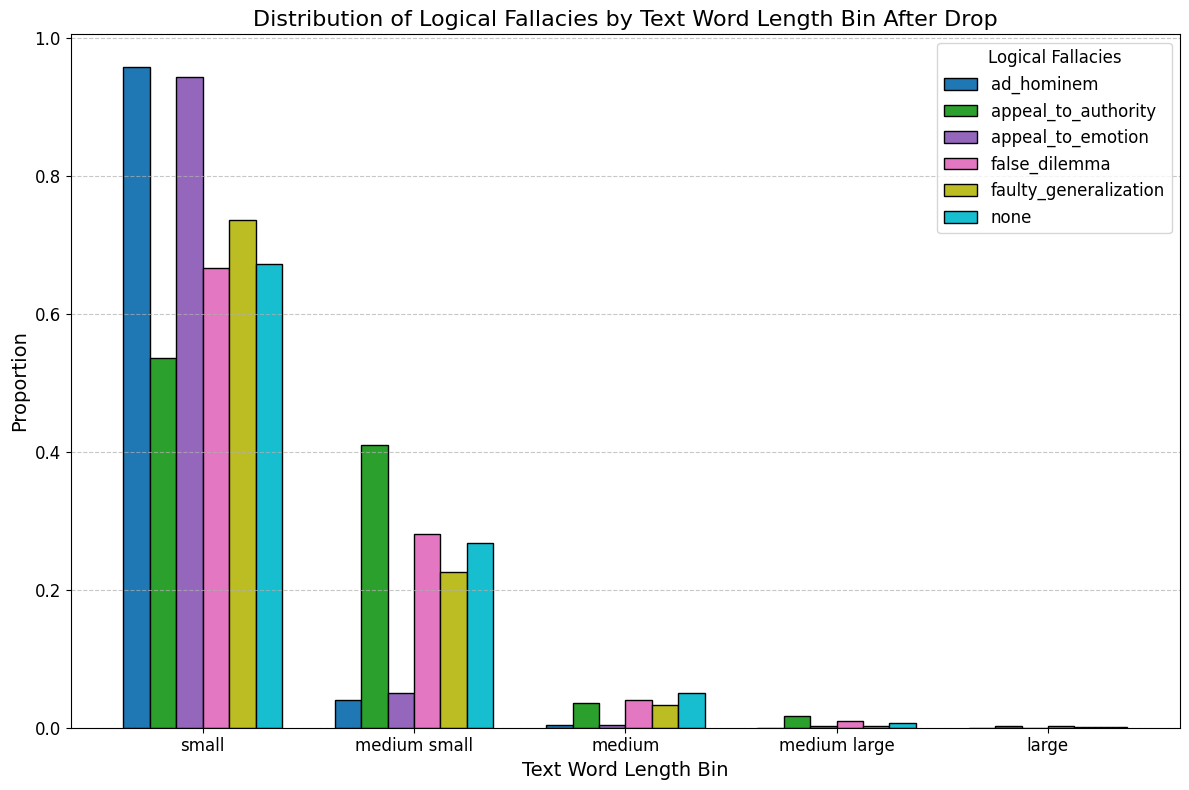

In [71]:
crosstable.plot(kind="bar", figsize=(12, 8), edgecolor="black", colormap="tab10", width = 0.75)
plt.title("Distribution of Logical Fallacies by Text Word Length Bin After Drop", fontsize=16)
plt.xlabel("Text Word Length Bin", fontsize=14)
plt.ylabel("Proportion", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Logical Fallacies", fontsize=12, title_fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [74]:
df_text['logical_fallacies'].value_counts()

logical_fallacies
none                     5429
appeal_to_emotion        1680
faulty_generalization    1401
ad_hominem               1111
false_dilemma             967
appeal_to_authority       728
Name: count, dtype: int64